In [8]:
import numpy as np
from scipy import signal
import scipy.fft
from scipy.fft import rfftfreq
import matplotlib.pyplot as plt
import os

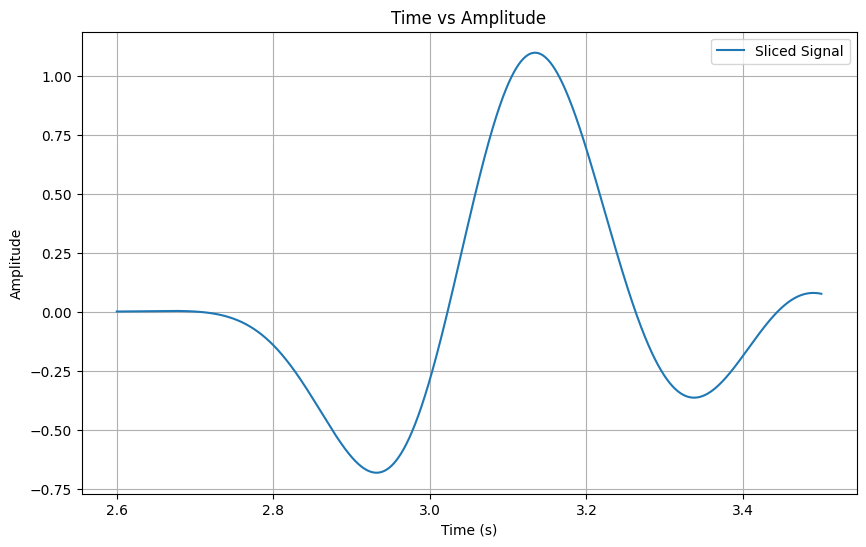

In [5]:

def slice_tof(file, first_limit, second_limit, dt, name):
    """
    Slice the solution from a .npy file and return a characteristic peak.
    Also, saves a plot of the sliced signal.
    """
    # Load data from .npy file
    H = np.load(file)
    amplitudes = H[-1, first_limit:second_limit]
    first_limit_time = first_limit * dt
    second_limit_time = second_limit * dt
    times = np.linspace(first_limit_time, second_limit_time, amplitudes.size)
    signal_sliced = np.array([times, amplitudes])

    # Save sliced data to a new file
    output_path = "../fig 10 QUS"
    
    os.chdir(output_path)
    np.save(f'{name}', signal_sliced.T)

    # Create a plot of the sliced signal
    plt.figure(figsize=(10, 6))
    plt.plot(times, amplitudes, label='Sliced Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Time vs Amplitude')
    plt.legend()
    plt.grid(True)
    #plt.savefig(f'{output_path}\\{name}.png')  # Save the figure
    plt.show()

# Example usage
file_path = "../fig 7 results ToF/nodes_f1100_dt_f0.0005_layer_n_256_0.npy"
slice_tof(file_path, 5200,7000, 0.0005, '0')


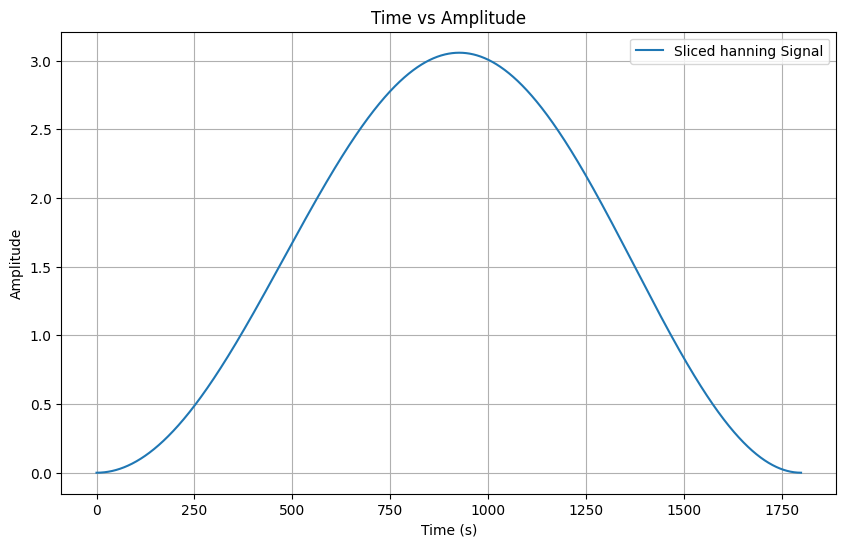

[0.00000000e+00 7.93037788e-06 3.17275173e-05 ... 4.26814846e-05
 1.06719293e-05 0.00000000e+00]


In [58]:
import numpy as np

def hanning_window(filename):
    # Load the signal from a .npy file
    signal = np.load(filename)
    signal = signal[:, 0]
    
    # Generate a Hanning window of the same length as the signal
    window = np.hanning(len(signal))
    
    # Apply the window to the signal
    windowed_signal = signal * window
    np.save(f'{filename}_windowed', windowed_signal)

    plt.figure(figsize=(10, 6))
    plt.plot(windowed_signal, label='Sliced hanning Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Time vs Amplitude')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{signal}.png')  # Save the figure
    plt.show()
    
    
    # You can either return this windowed signal or save it, etc.
    return windowed_signal

# Use the function
windowed_signal = hanning_window("0.npy")

# If you want to see what it looks like or perform further analysis, you might print or plot it here
print(windowed_signal)


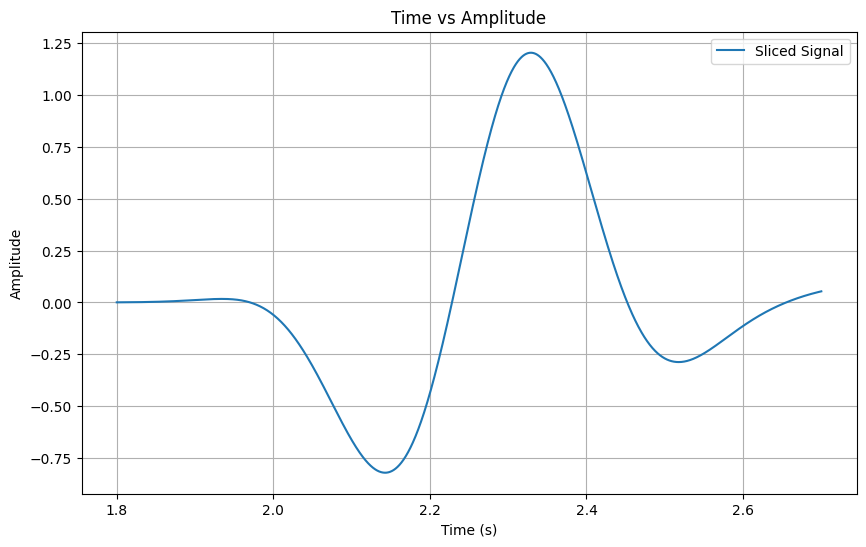

In [60]:
os.chdir("../fig 7 results")
file_path = "./nodes_f1100_dt_f0.0005_layer_n_256_1.npy"
slice_tof(file_path, 3600,5400, 0.0005, '10')

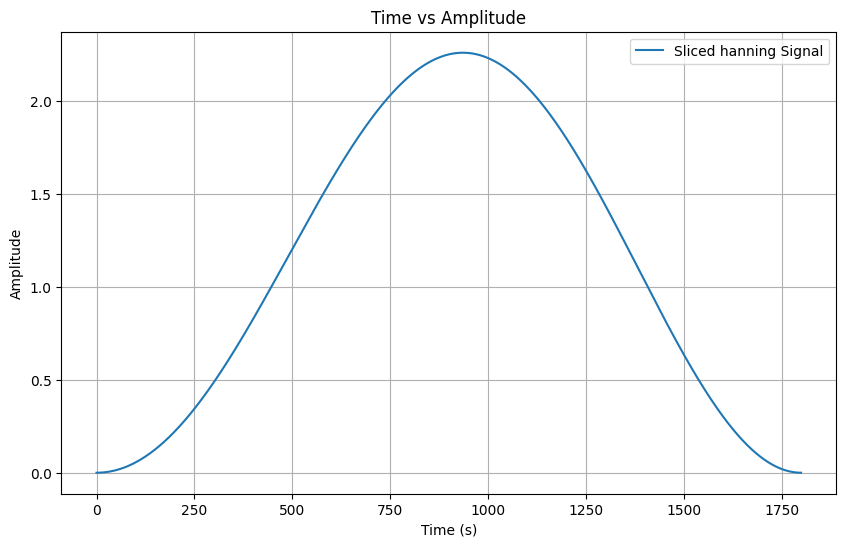

In [61]:
windowed_signal = hanning_window("10.npy")

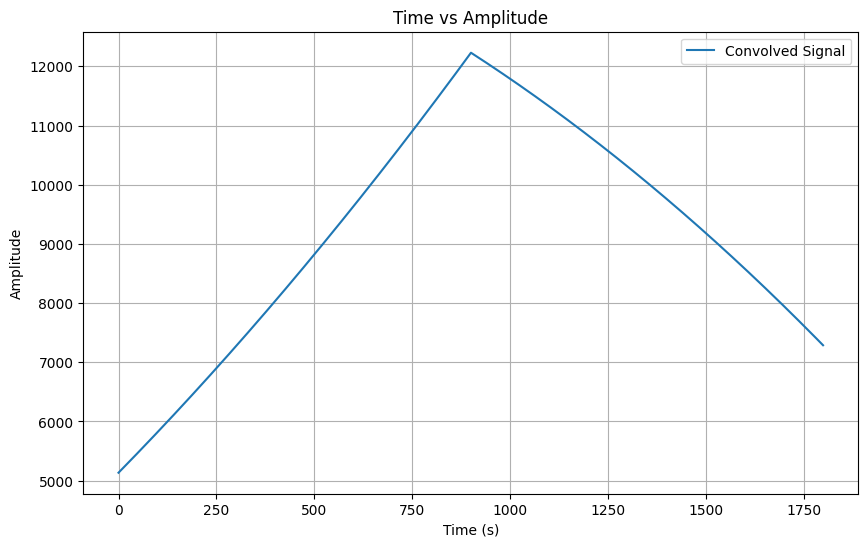

In [79]:
def conv(windowed_signal, signal, save_file='10_convolved', plot=False):
    if windowed_signal.ndim != 1 or signal.ndim != 1:
        raise ValueError("Both windowed_signal and signal must be one-dimensional")

    convolved = np.convolve(signal, windowed_signal, mode='same')
    np.save(save_file, convolved)

    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(convolved, label='Convolved Signal')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title('Time vs Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()

    return convolved

# Load signals
signal_filter = np.load("0.npy")
signal = np.load("10.npy")

# Ensure the signals are 1D if multi-dimensional
if signal_filter.ndim > 1:
    signal_filter = signal_filter[:, 0]
if signal.ndim > 1:
    signal = signal[:, 0]

# Call the conv function with optional plotting
signal_10 = conv(signal_filter, signal, save_file='signal_10_convolved.npy', plot=True)

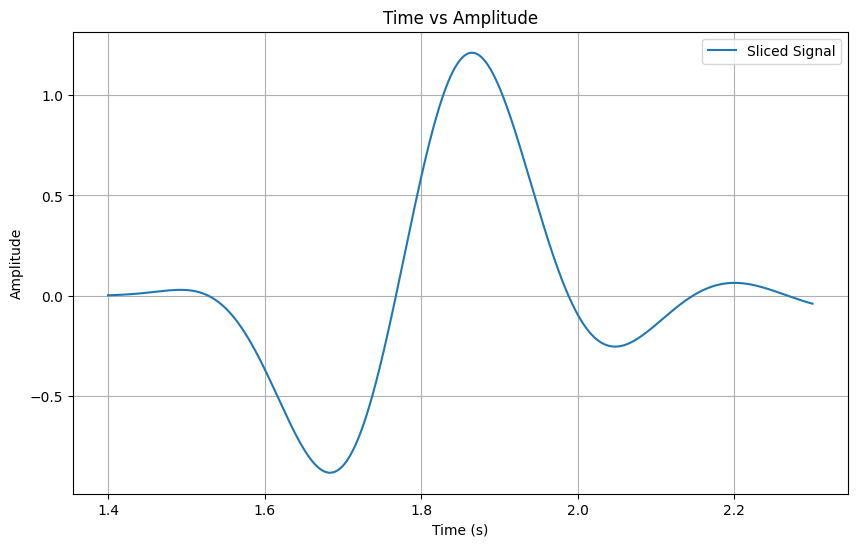

In [84]:
os.chdir("../fig 7 results")
file_path = "./nodes_f1100_dt_f0.0005_layer_n_256_2.npy"
slice_tof(file_path, 2800,4600, 0.0005, '20')

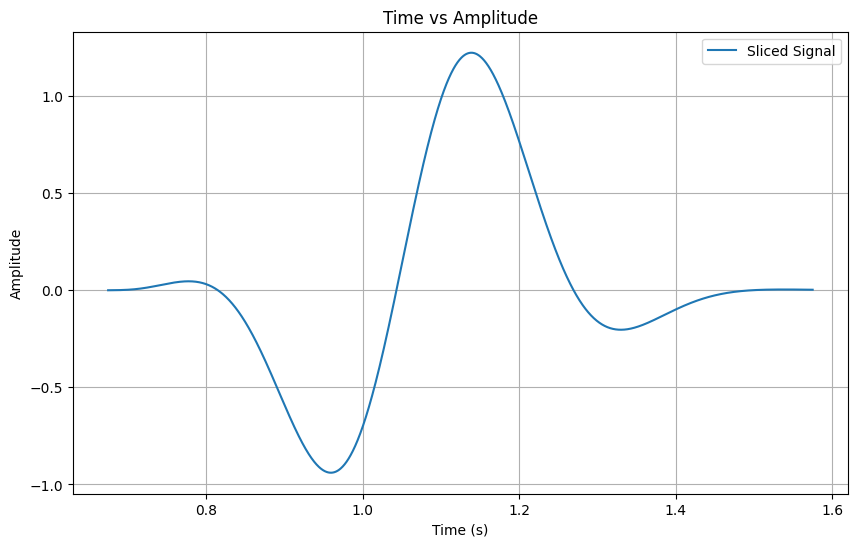

In [101]:
os.chdir("../fig 7 results")
file_path = "./nodes_f1100_dt_f0.0005_layer_n_256_8.npy"
slice_tof(file_path, 1350, 3150, 0.0005, '80')

1800


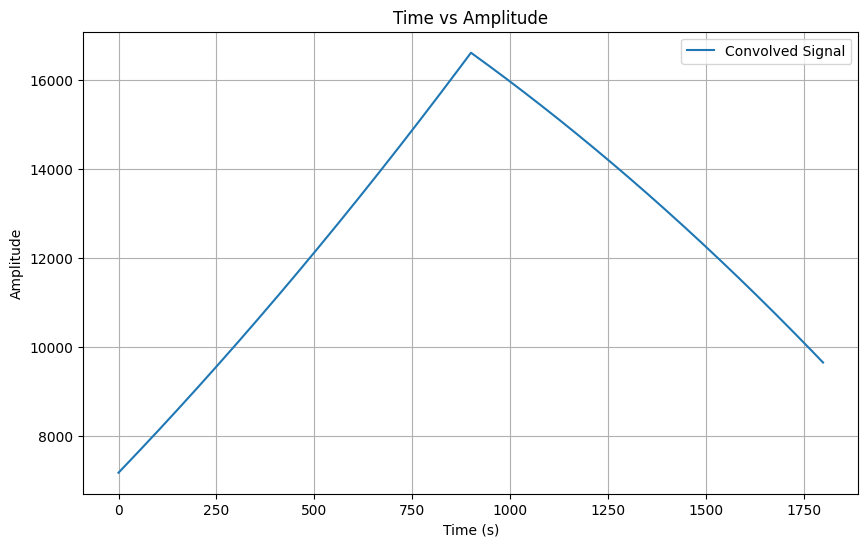

1800


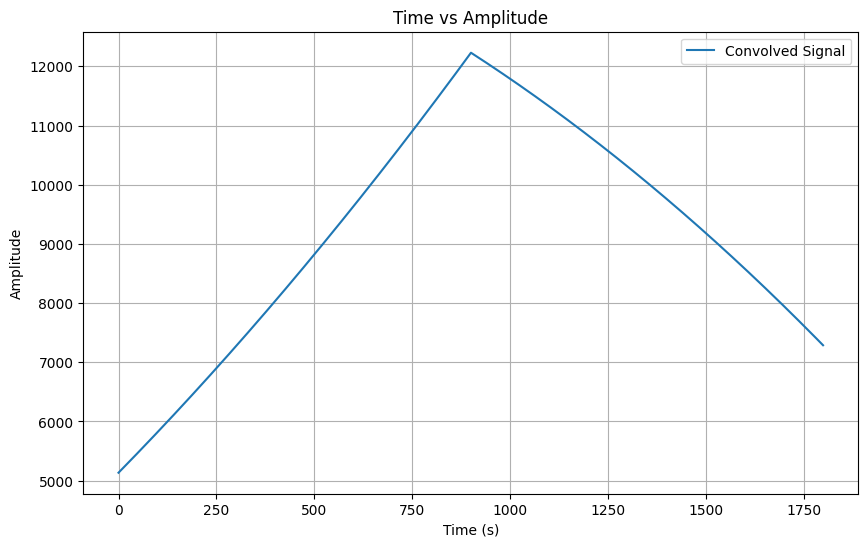

1800


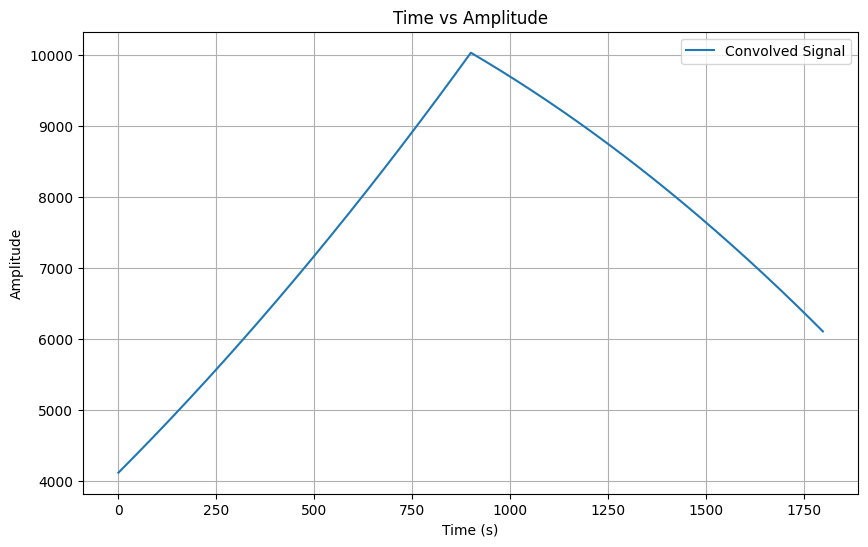

1800


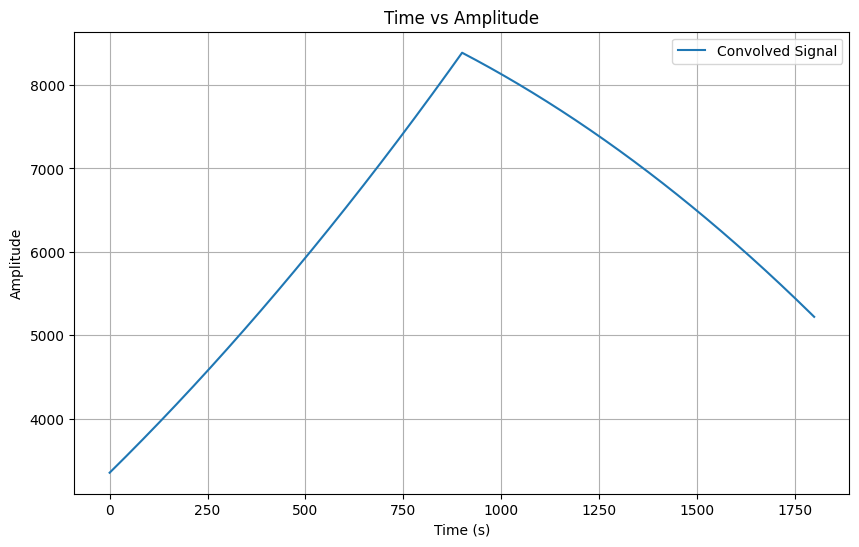

1800


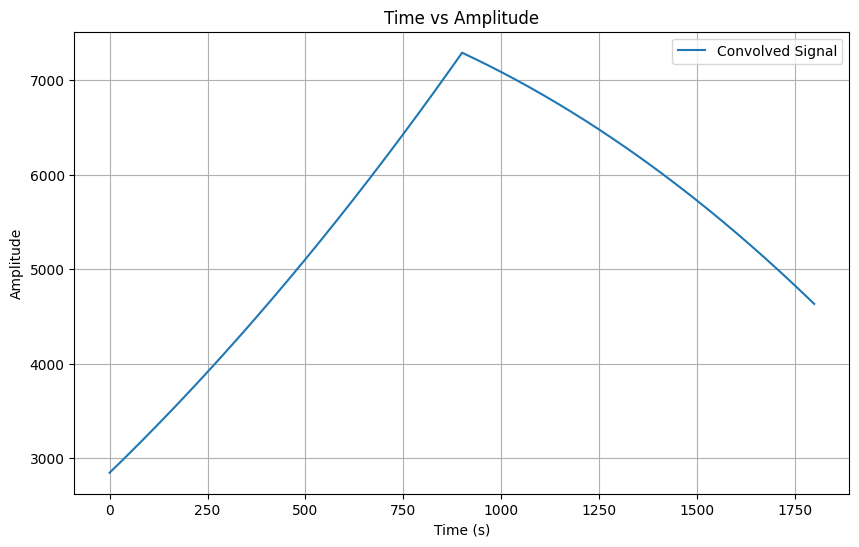

1800


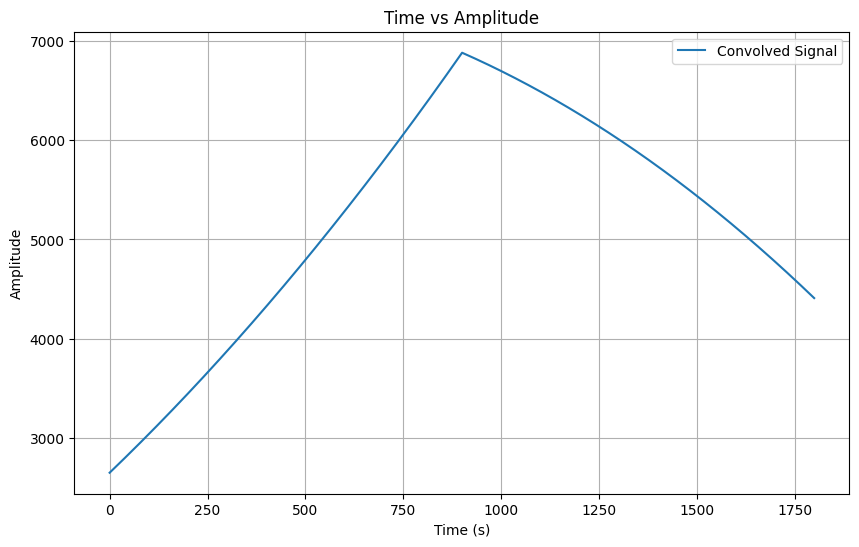

1800


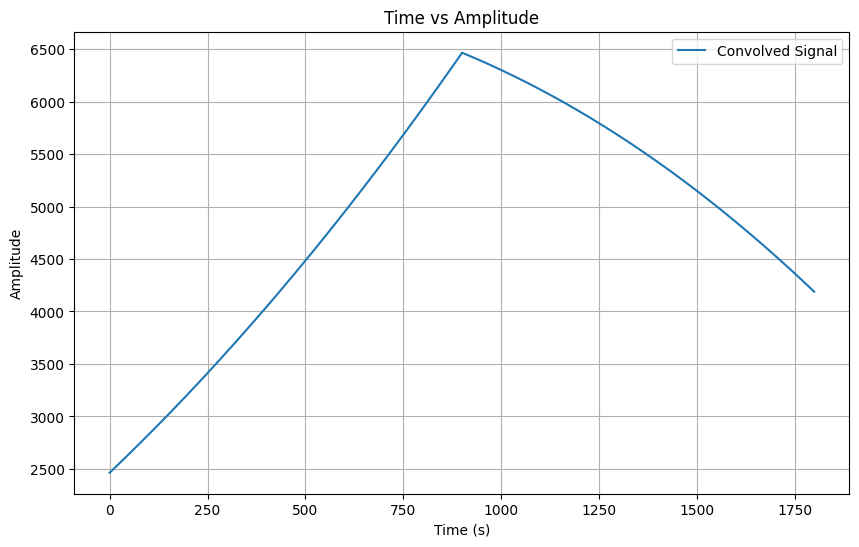

1800


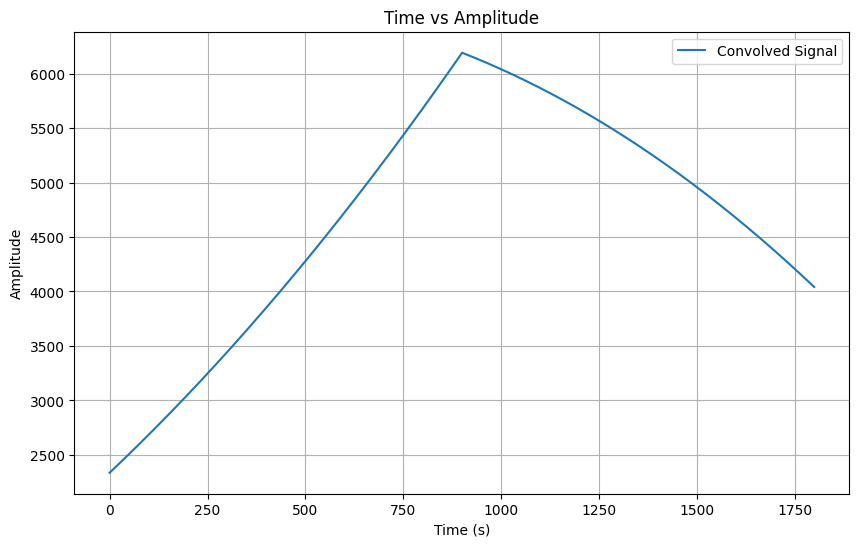

1800


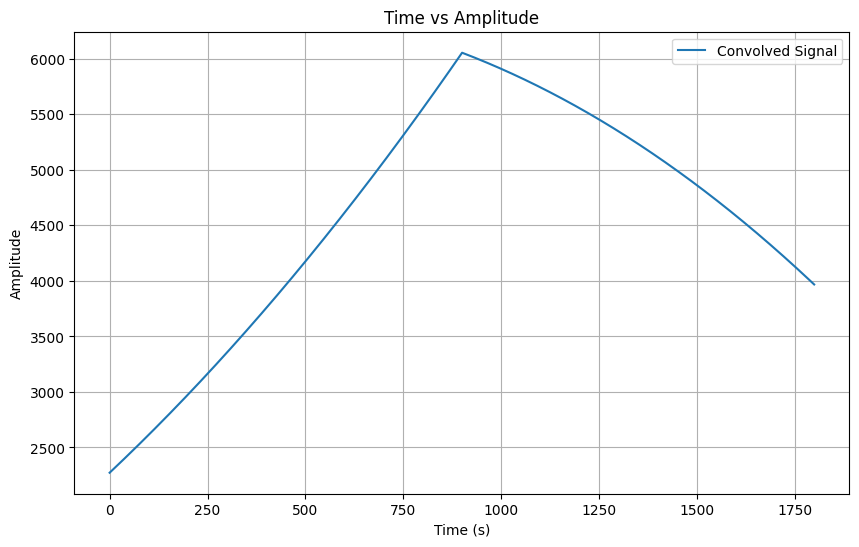

In [107]:
import numpy as np

# Assuming 'conv' is defined as in your previous messages, and it uses matplotlib for plotting
def conv(kernel, signal, save_file='convolved.npy', plot=False):
    convolved = np.convolve(signal, kernel, mode='same')
    print(len(convolved))
    np.save(save_file, convolved)
    if plot:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 6))
        plt.plot(convolved, label='Convolved Signal')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title('Time vs Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()
    return convolved

# Fixed kernel signal
signal_filter = np.load("0.npy")

# Loop through the signal files as specified
for i in range(0, 81, 10):  # Start at 0, end at 80, increment by 10
    signal_file = f"{i}.npy"
    signal = np.load(signal_file)
    output_file = f"signal_{i}_convolved.npy"
    
    # Call the conv function
    signal_10 = conv(signal_filter[:, 0], signal[:, 0], save_file=output_file, plot=True)

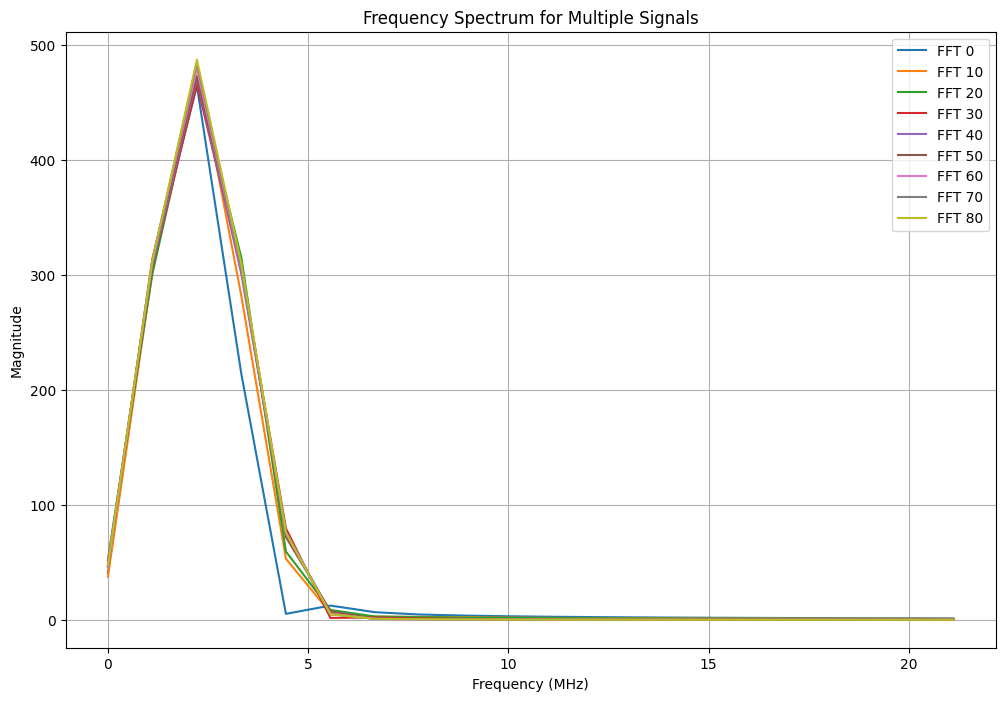

In [7]:
def fft(signal):
    fft_signal = np.abs(scipy.fft.rfft(signal))
    d = 5e-4  # Sampling interval
    freq = rfftfreq(signal.size, d)
    return freq, fft_signal

# Define the range of file indices and the increment
start, end, step = 0, 81, 10

# Prepare to collect frequency data for plotting
all_frequencies = []
all_fft_outputs = []

for i in range(start, end, step):
    file_name = f"{i}.npy"  # Generate the filename dynamically
    signal = np.load(file_name)
    
    # Assuming the signal is 2D and we need the second column
    if signal.ndim > 1 and signal.shape[1] >= 2:
        frequency, fft_output = fft(signal[:, 1])
    else:
        # Handle the case where the signal is not as expected
        continue
    
    # Slice to keep only the first 20 elements
    frequency = frequency[:20]
    fft_output = fft_output[:20]
    
    # Save the FFT output to a file with only the first 20 points
    np.save(f"fft_{i}_first_10", {'frequency': frequency, 'fft_output': fft_output})  # Save FFT magnitude data
    
    # Collect data for plotting
    all_frequencies.append(frequency)
    all_fft_outputs.append(fft_output)

# Plotting all FFT results
plt.figure(figsize=(12, 8))
for idx, fft_output in enumerate(all_fft_outputs):
    plt.plot(all_frequencies[idx], fft_output, label=f'FFT {start + idx * step}')
plt.title('Frequency Spectrum for Multiple Signals')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

190.6727211277865 60.219059903207935 311.3820992068151
200.99789548778708 51.65670416089468 303.47618163253406
188.6974522352585 65.11035654777355 300.983020186252
188.2596331209496 64.56720434734868 307.2066810276854
189.10770772578002 67.16805796442509 308.7708806196071
191.92617666401608 64.4321249555907 313.78920937542097
195.06224888979324 62.96490048513069 313.7680266108995
196.9051266258963 62.5184144255288 312.8343119596462
197.78751206804344 62.44564036886834 312.108046943732


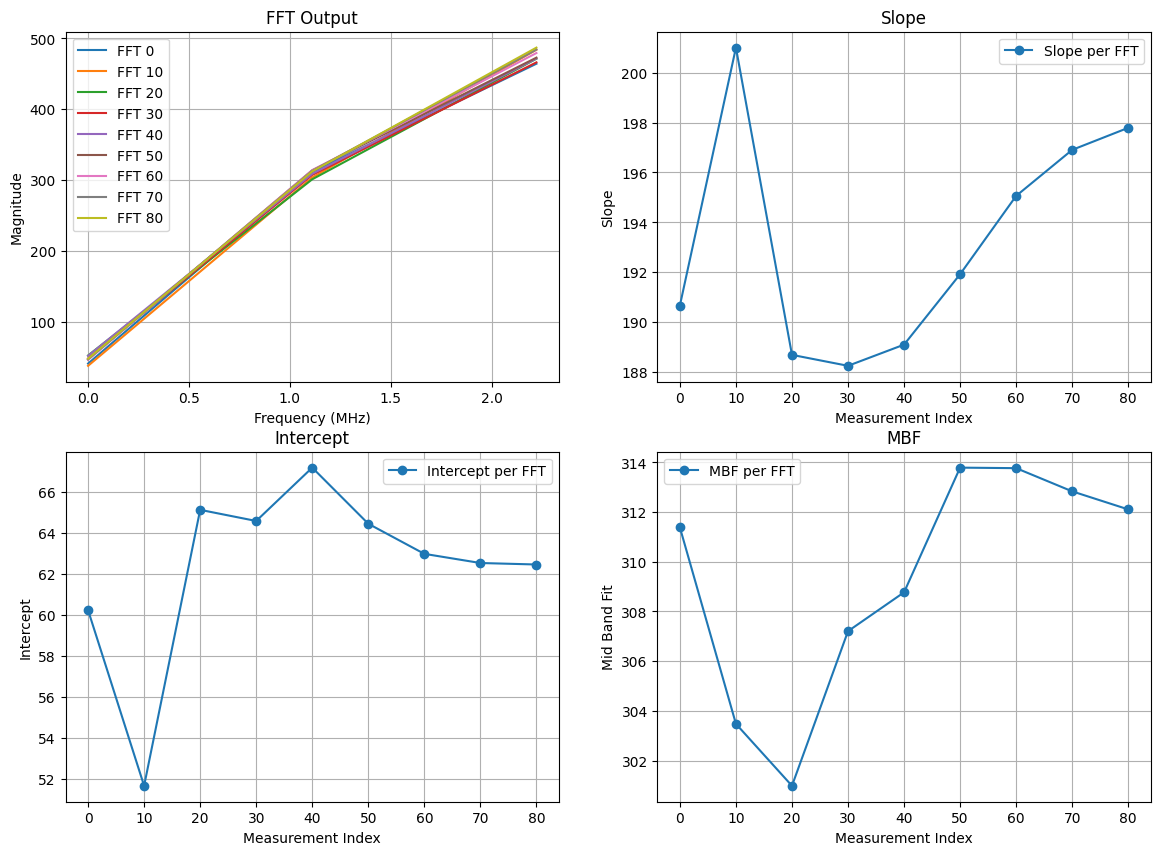

In [12]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt

# Define the range of file indices and the increment
start, end, step = 0, 81, 10

# Prepare to collect frequency data for plotting
all_frequencies = []
all_fft_outputs = []
all_slopes = []
all_intercepts = []
all_mid_band_fits = []
i_values = []  # List to store 'i' values

for i in range(start, end, step):
    file_name = f"{i}.npy"  # Generate the filename dynamically
    signal = np.load(file_name)
    
    # Assuming the signal is 2D and we need the second column
    if signal.ndim > 1 and signal.shape[1] >= 2:
        frequency, fft_output = fft(signal[:, 1])
    else:
        # Handle the case where the signal is not as expected
        continue
    
    # Find indices where the frequency is between 3.8 and 5.5 MHz
    mask = (frequency >= 0) & (frequency <= 2.5)
    frequency = frequency[mask]
    fft_output = fft_output[mask]

    slope, intercept = np.polyfit(frequency, fft_output, 1)
    
    # Find the Mid Band Fit at 4.65 MHz
    closest_index = np.abs(frequency - 1.25).argmin()
    mid_band_fit = fft_output[closest_index]
    
    # Save the FFT output to a file with only the desired frequency range and fit data
    np.save(f"fft_{i}_0_2.5MHz", {'frequency': frequency, 'fft_output': fft_output, 'slope': slope, 'intercept': intercept,
                                     'mid_band_fit': mid_band_fit})
    print(slope, intercept,mid_band_fit)
    
    # Collect data for plotting
    all_frequencies.append(frequency)
    all_fft_outputs.append(fft_output)
    all_slopes.append(slope)
    all_intercepts.append(intercept)
    all_mid_band_fits.append(mid_band_fit)
    i_values.append(i)

# Plotting all results
plt.figure(figsize=(14, 10))

# Plot fft_output
plt.subplot(2, 2, 1)
for idx, fft_output in enumerate(all_fft_outputs):
    plt.plot(all_frequencies[idx], fft_output, label=f'FFT {start + idx * step}')
plt.title('FFT Output')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Plot slopes
plt.subplot(2, 2, 2)
plt.plot(i_values, all_slopes, '-o', label='Slope per FFT')
plt.title('Slope')
plt.xlabel('Measurement Index')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)

# Plot intercepts
plt.subplot(2, 2, 3)
plt.plot(i_values, all_intercepts, '-o', label='Intercept per FFT')
plt.title('Intercept')
plt.xlabel('Measurement Index')
plt.ylabel('Intercept')
plt.legend()
plt.grid(True)

# Plot Mid Band Fit
plt.subplot(2, 2, 4)
plt.plot(i_values, all_mid_band_fits, '-o', label='MBF per FFT')
plt.title('MBF')
plt.xlabel('Measurement Index')
plt.ylabel('Mid Band Fit')
plt.legend()
plt.grid(True)